In [1]:
import numpy as np
import keras.backend as K
import tensorflow as tf

import DiffusionNet.Diffusion as df
import os.path
from DiffusionNet.autoencoder import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from keras.utils import np_utils
from keras.layers import Dense, Input
from keras.models import Model
from keras import regularizers

In [4]:
from pandas_plink import read_plink

bim, fam, bed = read_plink("/home/shussain/popviz/genomic_data/hgdp_QC_IMP")


/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) read_plink. (use function `read_plink1_bin` instead.) -- Deprecated since version 2.1.0.
  This is separate from the ipykernel package so we can avoid doing imports until
Mapping files: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]


In [2]:
from hands_io import get_data
imgs, moves = get_data("Rock")

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(bed.compute(), test_size=0.2, random_state=42)

In [3]:
from sklearn.datasets import make_blobs

X, lab = make_blobs(n_features=100)

In [5]:
embedding_size = 10
k = 40
K_mat = df.ComputeLBAffinity(X,k,sig=0.1)   # Laplace-Beltrami affinity: D^-1 * K * D^-1
P     = df.makeRowStoch(K_mat)                     # markov matrix 
E1,v1 = df.Diffusion(K_mat, nEigenVals=embedding_size+1)  # eigenvalues and eigenvectors
diff_embedding = np.matmul(E1, np.diag(v1)) # diffusion maps

/home/shussain/popviz/experiments/diffnet/DiffusionNet/Diffusion.py:22: RuntimeWarning: divide by zero encountered in true_divide
  Vecs = Vecs / Vecs[0,0]
/home/shussain/popviz/experiments/diffnet/DiffusionNet/Diffusion.py:22: RuntimeWarning: invalid value encountered in true_divide
  Vecs = Vecs / Vecs[0,0]
/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in matmul
  


In [6]:
P

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

(array([3980.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

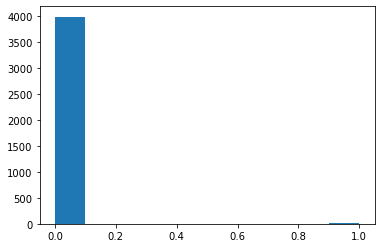

In [9]:
plt.hist(E1.ravel())

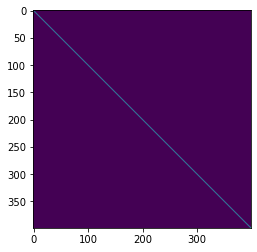

In [19]:
plt.imshow(P)